In [23]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

%pylab inline
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

Populating the interactive namespace from numpy and matplotlib
/kaggle/input/avocado-prices/avocado.csv


In [4]:
data_path = '/kaggle/input/avocado-prices/avocado.csv'
df = pd.read_csv(data_path)

In [9]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


Text(0, 0.5, 'Price per Unit')

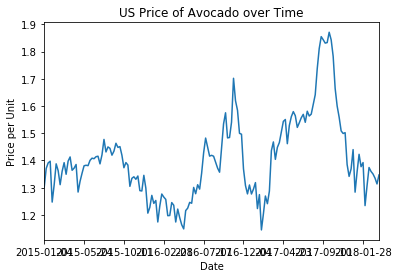

In [24]:
df.groupby('Date').mean()['AveragePrice'].plot()
plt.title('US Price of Avocado over Time')
plt.ylabel('Price per Unit')

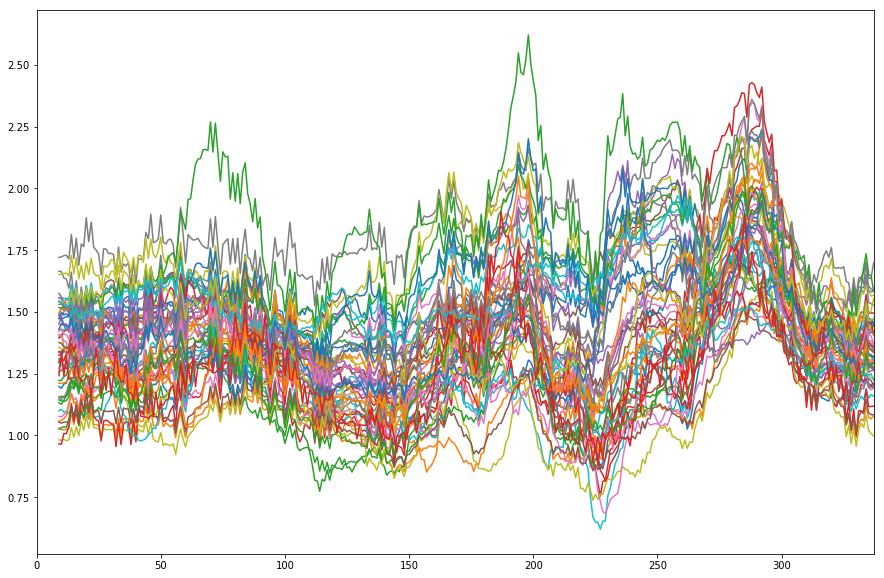

In [67]:
data = []
for region in df.region.unique():
    time_data = df[df.region==region].sort_values('Date')['AveragePrice'].reset_index(drop=True).rolling(10).mean()
    time_data.plot(figsize=(15,10))
    data.append(time_data)

In [69]:
prices = pd.concat(data, axis=1).dropna()
prices.columns = df.region.unique()
prices.head()

,Albany,Atlanta,BaltimoreWashington,Boise,Boston,BuffaloRochester,California,Charlotte,Chicago,CincinnatiDayton,...,SouthCarolina,SouthCentral,Southeast,Spokane,StLouis,Syracuse,Tampa,TotalUS,West,WestTexNewMexico
9,1.489,1.405,1.222,1.298,1.530,1.540,1.077,1.665,1.397,1.100,...,1.475,1.054,1.421,1.259,1.541,1.545,1.431,1.211,1.156,1.242
10,1.466,1.408,1.223,1.304,1.532,1.536,1.075,1.663,1.399,1.105,...,1.480,1.050,1.434,1.262,1.535,1.537,1.453,1.211,1.156,1.333
11,1.446,1.361,1.237,1.275,1.540,1.517,1.086,1.637,1.428,1.095,...,1.450,1.054,1.410,1.275,1.544,1.530,1.448,1.213,1.156,1.241
12,1.428,1.356,1.245,1.271,1.550,1.507,1.090,1.633,1.430,1.097,...,1.451,1.054,1.408,1.292,1.538,1.520,1.445,1.215,1.159,1.319
13,1.432,1.318,1.279,1.289,1.547,1.513,1.132,1.596,1.432,1.087,...,1.417,1.054,1.389,1.305,1.536,1.526,1.436,1.231,1.178,1.228


In [87]:
arb = pd.concat([prices.max(axis=1)-prices[c] for c in prices.columns], axis=1)
arb = pd.concat([arb, prices.idxmax(axis=1)], axis=1)
arb

In [100]:
import itertools as it
#Get all combinations of regions where a region doesn't equal itself
to_diff = [(i,j) for i,j in it.product(prices.columns, prices.columns) if i!=j]
#Perform all possible subtractions
diffs = pd.concat([prices[b]-prices[a] for a,b in to_diff], axis=1)
diffs.columns = to_diff

In [103]:
#For all possible buy/sell locations, get the pair with the maximal profit margin
arb = pd.concat([diffs.idxmax(axis=1),diffs.max(axis=1)], axis=1)
arb.columns = ['Buy_Sell', 'Profit_Per']
arb

,Buy_Sell,Profit_Per
9,"(PhoenixTucson, HartfordSpringfield)",0.754
10,"(PhoenixTucson, HartfordSpringfield)",0.758
11,"(Houston, HartfordSpringfield)",0.744
12,"(Houston, HartfordSpringfield)",0.750
13,"(Houston, HartfordSpringfield)",0.732
...,...,...
330,"(Houston, HartfordSpringfield)",0.609
331,"(Houston, HartfordSpringfield)",0.615
332,"(Houston, HartfordSpringfield)",0.592
333,"(Houston, SanFrancisco)",0.649


In [105]:
for i in arb.Buy_Sell:
    print(i)

('PhoenixTucson', 'HartfordSpringfield')
('PhoenixTucson', 'HartfordSpringfield')
('Houston', 'HartfordSpringfield')
('Houston', 'HartfordSpringfield')
('Houston', 'HartfordSpringfield')
('Houston', 'HartfordSpringfield')
('Houston', 'HartfordSpringfield')
('Houston', 'HartfordSpringfield')
('Houston', 'HartfordSpringfield')
('Houston', 'HartfordSpringfield')
('Houston', 'HartfordSpringfield')
('Houston', 'HartfordSpringfield')
('Houston', 'HartfordSpringfield')
('Houston', 'HartfordSpringfield')
('Houston', 'HartfordSpringfield')
('Houston', 'HartfordSpringfield')
('Houston', 'HartfordSpringfield')
('PhoenixTucson', 'HartfordSpringfield')
('Houston', 'HartfordSpringfield')
('Houston', 'HartfordSpringfield')
('Houston', 'HartfordSpringfield')
('Houston', 'HartfordSpringfield')
('Houston', 'HartfordSpringfield')
('PhoenixTucson', 'NewYork')
('Houston', 'HartfordSpringfield')
('PhoenixTucson', 'NewYork')
('Houston', 'NewYork')
('Houston', 'NewYork')
('Roanoke', 'NewYork')
('PhoenixTucson